In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Carga y preprocesamiento de datos

En primer lugar cargamos los datos que adquirimos en nuestro experimento. Vamos a utilizar la libreria pandas:

In [59]:
df = pd.read_csv("Datos/data_LeyDeOhm.csv")

df.head()

,corriente [mA],tension [V]
0,10.491378,1.045658
1,8.181423,0.813871
2,9.731880,1.005271
3,7.679995,0.773010
4,7.443637,0.728722


Al adquirir solemos tomar los datos de forma desordenada, una buena costumbre es ordenarlos, utilizamos la rutina sort de pandas y ordenamos por valor de corriente:

In [60]:
df_ord = df.sort_values(by='corriente [mA]')

Ahora guardamos los datos en array para operar mas facilmente. Además, como la corriente esta en unnidades $[mA]$ divido por 1000 para pasar los datos a [A] :

In [61]:
I = df_ord["corriente [mA]"].to_numpy()
V = df_ord["tension [V]"].to_numpy()

### Calculo de errores

Los valores de tensión y corriente fueron medidos con dos multimetros *modelo UT51-55* de 3 1/2 dígitos.

**Errores en el voltaje**:

$$
\Delta V = \frac{\% error}{100} \times V_{Medido} + n\times LSB
$$

Se midió en la escala de $2 V$.

El porcentaje de error es de $0.5\%$ (para todas las escalas).

En la escala de $2 V$, podemos ir del $0.000$ al $1.999$, entonces el LSB (bit menos significativo) es $0.001$. El valor de $n=1$ para todas las escalas.

Calculamos el error de voltaje:

In [62]:
Verr = (0.5/100)*V + 1*0.001

**Errores en la corriente**, 

$$
\Delta I = \frac{\% error}{100} \times I_{Medido} + n\times LSB
$$

Se midió en la escala de $20mA$.

Para esa escala el porcentaje de error es $0.8\%$.

En la escala de $20 mA$, podemos ir desde $00.00$ hasta $19.99$, entonces el LSB es $0.01$. Para esta escala $n=1$.

Calculamos el error de corriente:

In [63]:
Ierr = (0.8/100)*I + 1*0.01

La corriente esta en $mA$, antes de analizar los datos divido por $1000$ a $I$ y $Ierr$ para trabajar en Amperes:

In [64]:
I=I/1000
Ierr = Ierr/1000

Graficamos para inspeccionar visualmente nuestros datos

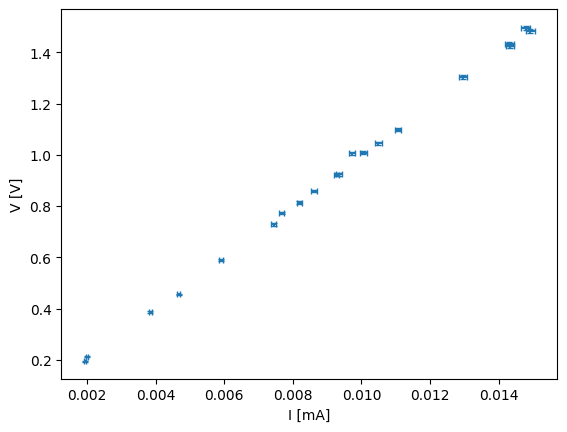

In [65]:
fig,ax = plt.subplots()

ax.errorbar( x=I,y=V, xerr=Ierr, yerr=Verr, fmt='none', capsize=2)

ax.set_xlabel("I [mA]")
ax.set_ylabel("V [V]")

plt.show()

## Ajuste Lineal



In [ ]:
import statsmodels.api as sm

w= 1/Verr**2

# Añadir intercepto (sm.add_constant)
Imatrix = sm.add_constant(I)  # Convierte I en matriz [1, I]

# Modelo con pesos (1/yerr²)
model = sm.WLS(V, Imatrix, weights=w)  # WLS = Weighted Least Squares
results = model.fit()

# Resultados detallados
#print(results.summary())

# Coeficientes (pendiente e intercepto) y errores
print("\nParámetros:")
print(f"Pendiente (m): {results.params[1]:.3f} ± {results.bse[1]:.3f}")
print(f"Intercepto (b): {results.params[0]:.3f} ± {results.bse[0]:.3f}")


Parámetros:
Pendiente (m): 99.329 ± 0.569
Intercepto (b): 0.005 ± 0.004


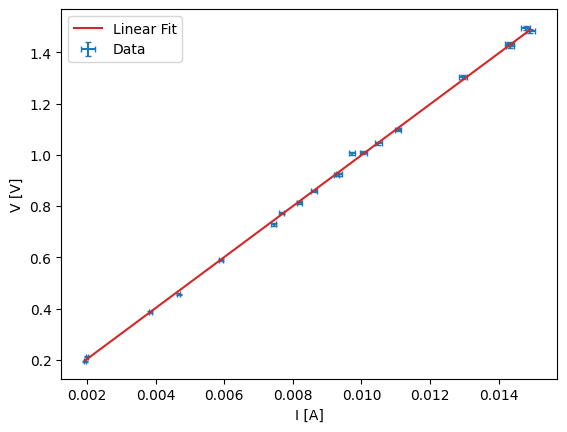

In [73]:
a, b = results.params
fl= lambda u: a+b*u


fig,ax = plt.subplots()

ax.errorbar( x=I,y=V, xerr=Ierr, yerr=Verr, fmt='none', capsize=2, label='Data')

ax.plot( I, fl(I), c='C3' , label='Linear Fit')

ax.set_xlabel("I [A]")
ax.set_ylabel("V [V]")

plt.legend()
plt.show()

In [77]:
df = df.rename(columns={"tension [V]": "V", "corriente [mA]":"I"})
df.head()

,I,V
0,10.491378,1.045658
1,8.181423,0.813871
2,9.731880,1.005271
3,7.679995,0.773010
4,7.443637,0.728722


In [78]:
import statsmodels.formula.api as smf

model = smf.wls('V ~ I', data=df, weights=1/Verr**2)
results = model.fit()

In [79]:
results.params

Intercept   -0.004852
I            0.100661
dtype: float64